### Assignment-01

#### 1. 第一节课的作业如下：

1. 复现课程的代码， BFS 路线搜索与文本自动生成；
2. 回答以下问题，并将问题发送至deeplearning.nlp.zh@gmail.com中：
```
    2.1. what do you want to acquire in this course？
    2.2. what problems do you want to solve？
    2.3. what’s the advantages you have to finish you goal?
    2.4. what’s the disadvantages you need to onvercome to finish you goal?
    2.5. How will you plan to study in this course period?
```
3. 完成以下联系，进一步体会 Data Driving的编程思想，完成你的第一个较为复杂的对话机器人。

#### 2. 如何提交

1. 代码 + 此 jupyter 相关，提交至自己的 github 中；
2. 第2问，整理发送至deeplearning.nlp.zh@gmail.com邮箱。

#### 3. 截止时间

此次作业截止时间为 2019.4.6日



In [56]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()
dictionary = {}
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}


/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements witho

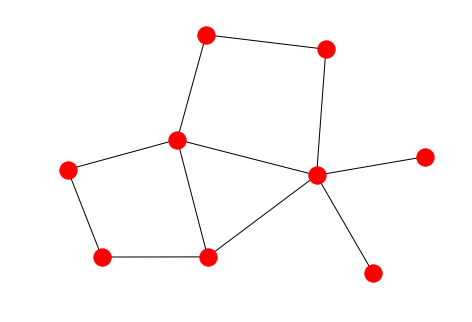

In [58]:
import networkx as nx
%matplotlib inline
graph = connection
g = nx.Graph(graph)
nx.draw(g)

In [61]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]    
        if froniter in seen: continue 
        successors = connection_graph[froniter]
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])         
        pathes = sorted(pathes, key=len)        
        seen.add(froniter)

In [62]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen: continue
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors     
        seen.add(froniter)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/pinga/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements witho

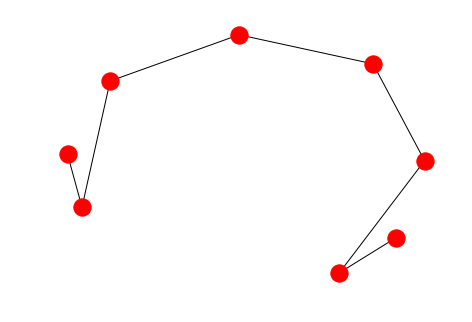

In [64]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}
nx.draw(nx.Graph(connection_2))
nagivator_bfs(0, 7, connection_2)



In [65]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    while pathes:
        froniter = pathes.pop(0)
        if froniter in seen: continue   
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes           
        seen.add(froniter)
nagivator_dfs(0, 7, connection_2)



standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [67]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [71]:
import random
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar
g = parse_grammar(grammar)
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')
gene(g)

'这个小猫坐在这个小小的小猫'

In [72]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

4/7-5-6
9/863-7+3
2*0/6/2
7-5*1*13
8*7*3-1
81/8/2-3
2-1-9-7
8-4+0-2
4*8*2-7
1/3-3-1
3/5*5+1
0+4/28-1
8-85+3+4
1/1/5*9
5-4+527*6
8*8-7-6
2*8+6+4
4/0*6*0
8*3/942*3
4*1-9/3


## 基于模式匹配的对话机器人实现

### Pattern Match

机器能否实现对话，这个长久以来是衡量机器人是否具有智能的一个重要标志。 Alan Turing早在其文中就提出过一个测试机器智能程度的方法，该方法主要是考察人类是否能够通过对话内容区分对方是机器人还是真正的人类，如果人类无法区分，我们就称之为具有”智能“。而这个测试，后来被大家叫做”图灵测试“，之后也被翻拍成了一步著名电影，叫做《模拟游戏》。 



既然图灵当年以此作为机器是否具备智能的标志，这项任务肯定是复杂的。自从 1960s 开始，诸多科学家就希望从各个方面来解决这个问题，直到如今，都只能解决一部分问题。 目前对话机器人的建立方法有很多，今天的作业中，我们为大家提供一共快速的基于模板的对话机器人配置方式。

此次作业首先希望大家能够读懂这段程序的代码，其次，在此基于我们提供的代码，**能够把它改造成汉语版本，实现对话效果。**

```
Pattern: (我想要A)
Response: (如果你有 A，对你意味着什么呢？)

Input: (我想要度假)
Response: (如果你有度假，对你意味着什么呢？)
```

为了实现模板的判断和定义，我们需要定义一个特殊的符号类型，这个符号类型就叫做"variable"， 这个"variable"用来表示是一个占位符。例如，定义一个目标: "I want X"， 我们可以表示成  "I want ?X", 意思就是?X是一个用来占位的符号。

如果输入了"I want holiday"， 在这里 'holiday' 就是 '?X'

In [2]:
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

In [3]:
def pat_match(pattern, saying):
    if is_variable(pattern[0]): return True
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

### 例如

In [4]:
pat_match('I want ?X'.split(), "I want holiday".split())

True

In [5]:
pat_match('I have dreamed a ?X'.split(), "I dreamed about dog".split())

False

In [6]:
pat_match('I dreamed about ?X'.split(), "I dreamed about dog".split())

True

### 获得匹配的变量

以上的函数能够判断两个 pattern 是不是相符，但是我们更加希望的是获得每个variable对应的是什么值。

我们对程序做如下修改:

In [7]:
def pat_match(pattern, saying):
    if is_variable(pattern[0]):
        return pattern[0], saying[0]
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:], saying[1:])

In [8]:
pattern = 'I want ?X'.split()
saying = "I want holiday".split()

In [9]:
pat_match(pattern, saying)

('?X', 'holiday')

In [10]:
pat_match("?X equals ?X".split(), "2+2 equals 2+2".split())

('?X', '2+2')

但是，如果我们的 Pattern 中具备两个变量，那么以上程序就不能解决了，我们可以对程序做如下修改: 


In [11]:
def pat_match(pattern, saying):
    if not pattern or not saying: return []
    
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        if pattern[0] != saying[0]: return []
        else:
            return pat_match(pattern[1:], saying[1:])

于是，我们可以获得： 

In [55]:
pat_match("?X greater than ?Y and ?Z".split(), "3 greater than 2 and 1".split())

[('?X', '3'), ('?Y', '2'), ('?Z', '1')]

如果我们知道了每个变量对应的是什么，那么我们就可以很方便的使用我们定义好的模板进行替换：

为了方便接下来的替换工作，我们新建立两个函数，一个是把我们解析出来的结果变成一个 dictionary，一个是依据这个 dictionary 依照我们的定义的方式进行替换。

In [13]:
def pat_to_dict(patterns):
    return {k: v for k, v in patterns}

In [14]:
def subsitite(rule, parsed_rules):
    if not rule: return []
    
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(rule[1:], parsed_rules)

In [15]:
got_patterns = pat_match("I want ?X".split(), "I want iPhone".split())

In [16]:
got_patterns

[('?X', 'iPhone')]

In [17]:
subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns))

['What', 'if', 'you', 'mean', 'if', 'you', 'got', 'a', 'iPhone']

为了将以上输出变成一句话，也很简单，我们使用 Python 的 join 方法即可： 

In [18]:
john_pat = pat_match('?P needs ?X'.split(), "John needs resting".split())

In [19]:
' '.join(subsitite("What if you mean if you got a ?X".split(), pat_to_dict(got_patterns)))

'What if you mean if you got a iPhone'

In [20]:
john_pat = pat_match('?P needs ?X'.split(), "John needs vacation".split())

In [21]:
subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat))

['Why', 'does', 'John', 'need', 'vacation', '?']

In [22]:
' '.join(subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat)))

'Why does John need vacation ?'

那么如果我们现在定义一些patterns，就可以实现基于模板的对话生成了:

In [23]:
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"], 
    "My ?X told me something": ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

In [24]:
pat_match()

TypeError: pat_match() missing 2 required positional arguments: 'pattern' and 'saying'

In [25]:
def get_response(saying, rules=defined_patterns):
    """" please implement the code, to get the response as followings:
    
    >>> get_response('I need iPhone') 
    >>> Image you will get iPhone soon
    >>> get_response("My mother told me something")
    >>> Talk about more about your monther.
    """
    for key in rules.keys():
        got_patterns = pat_match(key.split(),saying.split())
        if got_patterns != []:
            print(' '.join(subsitite(rules[key][0].split(), pat_to_dict(got_patterns))))
    

In [26]:
get_response("My mother told me something")

Talk about more about your mother


### Segment Match

我们上边的这种形式，能够进行一些初级的对话了，但是我们的模式逐字逐句匹配的， "I need iPhone" 和 "I need ?X" 可以匹配，但是"I need an iPhone" 和 "I need ?X" 就不匹配了，那怎么办？ 

为了解决这个问题，我们可以新建一个变量类型 "?\*X", 这种类型多了一个星号(\*),表示匹配多个

首先，和前文类似，我们需要定义一个判断是不是匹配多个的variable

In [27]:
def is_pattern_segment(pattern):
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])

In [28]:
is_pattern_segment('?*P')

True

In [29]:
from collections import defaultdict

然后我们把之前的 ```pat_match```程序改写成如下， 主要是增加了 ``` is_pattern_segment ```的部分. 

In [112]:
fail = [True, None]

def pat_match_with_seg(pattern, saying):
    if not pattern or not saying: return []
    
    pat = pattern[0]
    
    if is_variable(pat):
        return [(pat, saying[0])] + pat_match_with_seg(pattern[1:], saying[1:])
    elif is_pattern_segment(pat):
        match, index = segment_match(pattern, saying)
        return [match] + pat_match_with_seg(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:], saying[1:])
    else:
        return fail

这段程序里比较重要的一个新函数是 ```segment_match```，这个函数输入是一个以 ```segment_pattern```开头的模式，尽最大可能进行，匹配到这个*边长*的变量对于的部分。

In [113]:
def segment_match(pattern, saying):
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('?*', '?')

    if not rest: return (seg_pat, saying), len(saying)    
    
    for i, token in enumerate(saying):
        if rest[0] == token and is_match(rest[1:], saying[(i + 1):]):
            return (seg_pat, saying[:i]), i
    
    return (seg_pat, saying), len(saying)

def is_match(rest, saying):
    if not rest and not saying:
        return True
    if not all(a.isalpha() for a in rest[0]):
        return True
    if rest[0] != saying[0]:
        return False
    return is_match(rest[1:], saying[1:])

In [114]:
segment_match('?*P is very good'.split(), "My dog and my cat is very good".split())

(('?P', ['My', 'dog', 'and', 'my', 'cat']), 5)

现在，我们就可以做到以下的匹配模式了: 

In [33]:
pat_match_with_seg('?*P is very good and ?*X'.split(), "My dog is very good and my cat is very cute".split())

[('?P', ['My', 'dog']), ('?X', ['my', 'cat', 'is', 'very', 'cute'])]

如果我们继续定义一些模板，我们进行匹配，就能够进行更加复杂的问题了: 

In [34]:
response_pair = {
    'I need ?X': [
        "Why do you neeed ?X"
    ],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

In [35]:
pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())

[('?X', ['an', 'iPhone'])]

In [36]:
subsitite("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', ['an', 'iPhone']]

 我们会发现，pat_to_dict在这个场景下会有有一点小问题，没关系，修正一些: 

In [37]:
def pat_to_dict(patterns):
    return {k: ' '.join(v) if isinstance(v, list) else v for k, v in patterns}

In [38]:
subsitite("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', 'an iPhone']

如果我们定义这样的一个模板:

In [39]:
("?*X hello ?*Y", "Hi, how do you do")

('?*X hello ?*Y', 'Hi, how do you do')

In [40]:
' '.join(subsitite("Hi, how do you do?".split(), pat_to_dict(pat_match_with_seg('?*X hello ?*Y'.split(), 
                  "I am mike, hello ".split()))))

'Hi, how do you do?'

In [41]:
pattern = pat_match_with_seg('?*X hello ?*Y'.split(), 
                  "I am mike, hello ".split())
#print(pattern)
rules_1 = {
    "?*X hello ?*Y": ["Hi, how do you do?"]
}
def res(saying,response_rules=rules_1):
    for key in response_rules:
        got_patterns = pat_match_with_seg(key.split(),saying.split())
    print(got_patterns)
    
    
res('I am mike, hello')

[('?X', ['I', 'am', 'mike,'])]


### 现在是你的时间了

### 问题1

编写一个程序, ```get_response(saying, response_rules)```输入是一个字符串 + 我们定义的 rules，例如上边我们所写的 pattern， 输出是一个回答。

In [42]:
#我们给大家一些例子: 
rules_1 = {
    "I was ?*X": ["Were you really ?X ?", "I already knew you were ?X ."],
    "?*X hello ?*Y": ["Hi, how do you do?"]
}

rules_2 = {
    '?*x hello ?*y': ['How do you do', 'Please state your problem'],
    '?*x I want ?*y': ['what would it mean if you got ?y', 'Why do you want ?y', 'Suppose you got ?y soon'],
    '?*x if ?*y': ['Do you really think its likely that ?y', 'Do you wish that ?y', 'What do you think about ?y', 'Really-- if ?y'],
    '?*x no ?*y': ['why not?', 'You are being a negative', 'Are you saying \'No\' just to be negative?'],
    '?*x I was ?*y': ['Were you really', 'Perhaps I already knew you were ?y', 'Why do you tell me you were ?y now?'],
    '?*x I feel ?*y': ['Do you often feel ?y ?', 'What other feelings do you have?']
}

In [140]:
import random
def get_response_english(saying, response_rules):
    for key in response_rules.keys():
        #print(key.split())
        #print(saying.split())
        word_list=pat_match_with_seg(key.split(),saying.split())
        print(key)
        print(word_list)
        if len(word_list[0][1])!=len(saying.split()):
            if word_list:           
                dic=pat_to_dict(word_list)
                words=subsitite(random.sample(response_rules[key],1)[0].split(),dic)
                sentence=' '.join(words)
                return sentence
get_response_english('I feel good',rules_2)

?*x hello ?*y
[('?x', ['I', 'feel', 'good'])]
?*x I want ?*y
[('?x', ['I', 'feel', 'good'])]
?*x if ?*y
[('?x', ['I', 'feel', 'good'])]
?*x no ?*y
[('?x', ['I', 'feel', 'good'])]
?*x I was ?*y
[('?x', ['I', 'feel', 'good'])]
?*x I feel ?*y
[('?x', []), ('?y', ['good'])]


'What other feelings do you have?'

### 问题2

改写以上程序，将程序变成能够支持中文输入的模式。
*提示*: 你可以需用用到 jieba 分词

In [49]:
import jieba
import re

当对中文进行分字的时候会报错

In [168]:
def chinese_split(string):
    l = []
    xyz = ''
    patt = ['?','*','x','y','z']
    for i in string:
        if i in patt:
                xyz += i
        else:
            if xyz != '':
                l.append(xyz)
                l.append(i)
                xyz = ''
            else:
                l.append(i)
    if string[-1] in patt:
        l.append(xyz)
    return l
chinese_split('?*x有些人?*y')

['?*x', '有', '些', '人', '?*y']

In [169]:
def get_response_chinese(saying, response_rules):
    for key in response_rules.keys():
        word_list=pat_match_with_seg(chinese_split(key),chinese_split(saying))
        if len(word_list[0][1])!=len(chinese_split(saying)):
            if word_list:           
                dic=pat_to_dict(word_list)
                words=subsitite(random.sample(response_rules[key],1)[0].split(),dic)
                sentence=' '.join(words)
                return sentence
print(get_response_chinese('听说所有人都去了加拿大',test_rulse))
print(get_response_chinese('平板就像手机',test_rulse))

你看到的其实只是一小部分人


IndexError: list index out of range

对中文进行分词时，则能正常运行

In [225]:
def to_chunks(pat):
    ret = []
    for p in pat:
        if not isinstance(p, list):
            ret.append(p)
            continue
        for s in p:
            ret.append(s)
    return ret

def is_chinese(str):
    return re.findall(u'[\u4e00-\u9fff]+', str)

def split_pattern(pat):
    rep_str = {
        '?*x':' ?*x ',
        '?*y':' ?*y ',
        '?*z': ' ?*z ',
        '?x':' ?x ',
        '?y':' ?y ',
        '?z':' ?z ',
    }
    #print("----original \"%s\"" % pat)
    for key, val in rep_str.items():
        pat = pat.replace(key, val)
    #print("----replace \"%s\"" % pat)
    pat = pat.split()
    #print("----split %s" % pat)
    pat = [list(jieba.cut(p, cut_all=False)) if is_chinese(p) else p for p in pat]
    #print("----jieba cut %s" % pat)
    pat = to_chunks(pat)
    #print("----to chunks %s" % pat)
    return pat

In [242]:
jieba.add_word("AI")
def get_response_all(saying, response_rules):
    for key in response_rules.keys():
        word_list=pat_match_with_seg(split_pattern(key),split_pattern(saying))
        #print(word_list)
        if len(word_list[0][1])!=len(split_pattern(saying)):
            if word_list:
                dic=pat_to_dict(word_list)
                #print(split_pattern(random.sample(response_rules[key],1)[0]))
                words=subsitite(split_pattern(random.sample(response_rules[key],1)[0]),dic)
                sentence=' '.join(words)
                return sentence
print(get_response_all('听说所有人都去了加拿大',rule_responses))
print(get_response_all('平板就像手机',rule_responses))
print(get_response_all("I feel good",rule_responses))

你 能 想到 一点 特殊 情况 吗 ？
你 觉得 平板 和 手机 有 什么 相似性 ？
Do you often feel good ?


### 问题3

多设计一些模式，让这个程序变得更好玩，多和大家交流，看看大家有什么好玩的模式

### 问题4

1. 这样的程序有什么优点？有什么缺点？你有什么可以改进的方法吗？ 
2. 什么是数据驱动？数据驱动在这个程序里如何体现？
3. 数据驱动与 AI 的关系是什么？ 


1.
优点：逻辑较为简单，容易理解，对某些固定模式的对话交流非常有用，基于(key,value)，有较快的查找速度
缺点：匹配规则固定，完全基于人工设定，有多少人工就有多少智能
改进方法：加入数学模型
2.
数据驱动即为程序能够用于多种数据模式，而不需要对特定数据模式进行改动
本程序体现在，如果想要增加新类型的对话模式，只需要在pattern中添加即可，而不需要改变程序
3.
AI即在有限数据驱动下能对未知数据做出正确的决策。

一些参考 pattern

In [236]:
rule_responses = {
    '?*x hello ?*y': ['How do you do', 'Please state your problem'],
    '?*x I want ?*y': ['what would it mean if you got ?y', 'Why do you want ?y', 'Suppose you got ?y soon'],
    '?*x if ?*y': ['Do you really think its likely that ?y', 'Do you wish that ?y', 'What do you think about ?y', 'Really-- if ?y'],
    '?*x no ?*y': ['why not?', 'You are being a negative', 'Are you saying \'No\' just to be negative?'],
    '?*x I was ?*y': ['Were you really', 'Perhaps I already knew you were ?y', 'Why do you tell me you were ?y now?'],
    '?*x I feel ?*y': ['Do you often feel ?y ?', 'What other feelings do you have?'],
    '?*x你好?*y': ['你好呀', '请告诉我你的问题'],
    '?*x我想?*y': ['你觉得?y有什么意义呢？', '为什么你想?y', '你可以想想你很快就可以?y了'],
    '?*x我想要?*y': ['?x想问你，你觉得?y有什么意义呢?', '为什么你想?y', '?x觉得... 你可以想想你很快就可以有?y了', '你看?x像?y不', '我看你就像?y'],
    '?*x喜欢?*y': ['喜欢?y的哪里？', '?y有什么好的呢？', '你想要?y吗？'],
    '?*x讨厌?*y': ['?y怎么会那么讨厌呢?', '讨厌?y的哪里？', '?y有什么不好呢？', '你不想要?y吗？'],
    '?*xAI?*y': ['你为什么要提AI的事情？', '你为什么觉得AI要解决你的问题？'],
    '?*x机器人?*y': ['你为什么要提机器人的事情？', '你为什么觉得机器人要解决你的问题？'],
    '?*x对不起?*y': ['不用道歉', '你为什么觉得你需要道歉呢?'],
    '?*x我记得?*y': ['你经常会想起这个吗？', '除了?y你还会想起什么吗？', '你为什么和我提起?y'],
    '?*x如果?*y': ['你真的觉得?y会发生吗？', '你希望?y吗?', '真的吗？如果?y的话', '关于?y你怎么想？'],
    '?*x我?*z梦见?*y':['真的吗? --- ?y', '你在醒着的时候，以前想象过?y吗？', '你以前梦见过?y吗'],
    '?*x妈妈?*y': ['你家里除了?y还有谁?', '嗯嗯，多说一点和你家里有关系的', '她对你影响很大吗？'],
    '?*x爸爸?*y': ['你家里除了?y还有谁?', '嗯嗯，多说一点和你家里有关系的', '他对你影响很大吗？', '每当你想起你爸爸的时候， 你还会想起其他的吗?'],
    '?*x我愿意?*y': ['我可以帮你?y吗？', '你可以解释一下，为什么想?y'],
    '?*x我很难过，因为?*y': ['我听到你这么说， 也很难过', '?y不应该让你这么难过的'],
    '?*x难过?*y': ['我听到你这么说， 也很难过',
                 '不应该让你这么难过的，你觉得你拥有什么，就会不难过?',
                 '你觉得事情变成什么样，你就不难过了?'],
    '?*x就像?*y': ['你觉得?x和?y有什么相似性？', '?x和?y真的有关系吗？', '怎么说？'],
    '?*x和?*y都?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x和?*y一样?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x我是?*y': ['真的吗？', '?x想告诉你，或许我早就知道你是?y', '你为什么现在才告诉我你是?y'],
    '?*x我是?*y吗': ['如果你是?y会怎么样呢？', '你觉得你是?y吗', '如果你是?y，那一位着什么?'],
    '?*x你是?*y吗':  ['你为什么会对我是不是?y感兴趣?', '那你希望我是?y吗', '你要是喜欢， 我就会是?y'],
    '?*x你是?*y' : ['为什么你觉得我是?y'],
    '?*x因为?*y' : ['?y是真正的原因吗？', '你觉得会有其他原因吗?'],
    '?*x我不能?*y': ['你或许现在就能?*y', '如果你能?*y,会怎样呢？'],
    '?*x我觉得?*y': ['你经常这样感觉吗？', '除了到这个，你还有什么其他的感觉吗？'],
    '?*x我?*y你?*z': ['其实很有可能我们互相?y'],
    '?*x你为什么不?*y': ['你自己为什么不?y', '你觉得我不会?y', '等我心情好了，我就?y'],
    '?*x好的?*y': ['好的', '你是一个很正能量的人'],
    '?*x嗯嗯?*y': ['好的', '你是一个很正能量的人'],
    '?*x不嘛?*y': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    '?*x不要?*y': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    '?*x有些人?*y': ['具体是哪些人呢?'],
    '?*x有的人?*y': ['具体是哪些人呢?'],
    '?*x某些人?*y': ['具体是哪些人呢?'],
    '?*x每个人?*y': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    '?*x所有人?*y': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    '?*x总是?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x一直?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x或许?*y': ['你看起来不太确定'],
    '?*x可能?*y': ['你看起来不太确定'],
    '?*x他们是?*y吗？': ['你觉得他们可能不是?y？'],
    '?*x': ['很有趣', '请继续', '我不太确定我很理解你说的, 能稍微详细解释一下吗?']
}


In [55]:
5//2

2